In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def sinc_win(P,N):
    M=N*P
    x = (np.arange(0,M)-M/2)/N
    return np.sinc(x)

def get_pow(N, win):
    delnu = np.linspace(1,0,100)
    pos = np.zeros(800)
    fcenter = 10
    deltaf = np.arange(-3,5)
    t = np.linspace(0,1,N)
    for i, df in enumerate(deltaf):
        for j,dnu in enumerate(delnu):
            x=win(N)*np.exp(2j*np.pi*(fcenter+dnu)*t)
            X=np.fft.fft(x)
#             print(f"dist k-nu is {df-dnu}")
            pos[i*100+j] = np.abs(X[fcenter+df])**2
#     print(pos)
            
    return pos

def pfb(x,N,ntap):
    M=N*ntap
    s = sinc_win(ntap,N)
    h = np.hanning(M)
    # equivalent
#     y = s*h*x
#     y = y.reshape(-1,N,order='c')
#     y = np.sum(y, axis=0)
#     X = np.fft.fft(y)
    X = np.fft.fft(s*h*x)
    X = X[::ntap].copy()
    return X

def get_pow_pfb(N, ntap):
    
    delnu = np.linspace(1,0,100)
    pos = np.zeros(800)
    fcenter = 10
    deltaf = np.arange(-3,5)
    M=N*ntap
    # Convention: N is for 1 sec. basically N Hz. So n taps in ntap seconds.
    t = np.linspace(0,ntap,M)
    for i, df in enumerate(deltaf):
        for j,dnu in enumerate(delnu):
            x=np.exp(2j*np.pi*(fcenter+dnu)*t)
            X=pfb(x,N,ntap)
#             print(f"dist k-nu is {df-dnu}")
            pos[i*100+j] = np.abs(X[fcenter+df])**2
#     print(pos)
    return pos

In [4]:
han = lambda N: np.hanning(N)
flat = lambda N: np.ones(N)
pos = get_pow(1024,flat)
pos2 = get_pow(1024,han)
pos3 = get_pow_pfb(1024,8)

[-6.28318531 -6.28011735 -6.27704938 ...  6.27398142  6.27704938
  6.28011735]


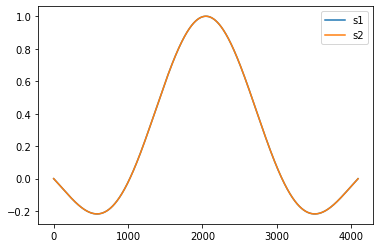

In [144]:
s1=sinc_win(4,1024) # Mine
s2=sinc_window(4,1024) # Jon's
plt.plot(s1,label="s1")
plt.plot(s2,label="s2")
plt.legend()

(-80.0, 1.0)

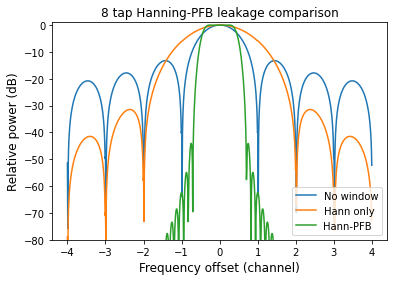

In [5]:
xl=np.linspace(-4,4,800)
plt.title('8 tap Hanning-PFB leakage comparison')
plt.plot(xl,10*np.log10(pos/pos.max()),label='No window')
plt.plot(xl,10*np.log10(pos2/pos2.max()), label='Hann only')
plt.plot(xl,10*np.log10(pos3/pos3.max()),label='Hann-PFB')
plt.legend()
plt.ylabel('Relative power (dB)',fontsize=12)
plt.xlabel('Frequency offset (channel)',fontsize=12)
plt.ylim(-80,1)

In [172]:
pos3 = get_pow_pfb(1024,8,128)

In [163]:
n=4096
nu=131.99
t = np.linspace(0,1,n)
# x = np.exp(2j*np.pi*nu*t)
x = np.sin(2*np.pi*nu*t)
Xf = pfb(x,1024,4)
# t = np.linspace(0,1,1024)
# x = np.sin(2*np.pi*nu*t)
Xfnormal = np.fft.rfft(x)

(0.0, 2000.0)

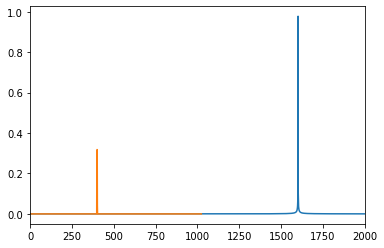

In [84]:
t = np.linspace(0,4,1024*4)
nu = 400.123
x = np.exp(2j*np.pi*nu*t)
ff=np.fft.fft(x)
pp=pfb(x,1024,4)
plt.plot(np.abs(ff)/4096)
plt.plot(np.abs(pp)/1024)
plt.xlim(0,2000)
# print(np.abs(ff[1599]))

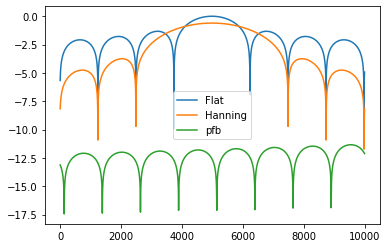

In [32]:
plt.plot(np.log10(pos/1024**2),label='Flat')
plt.plot(np.log10(pos2/1024**2), label='Hanning')
plt.plot(np.log10(pos3/1024**2), label='pfb')
plt.legend()
# plt.ylim(-80,0)

In [7]:
s = sinc_win(4,1024)
h = np.hanning(4096)


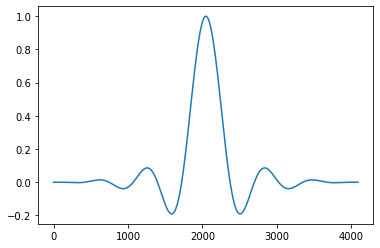

In [10]:
plt.plot(s*h)

(0.0, 20.0)

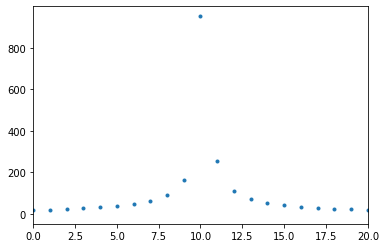

In [100]:
plt.plot(np.abs(X), '.')
plt.xlim(0,20)

In [93]:
N=1024
offset = np.linspace(-5,5,1001)
# offset=np.arange(-5,6)
po = np.sin(np.pi*offset)**2/np.sin(np.pi*offset/N)**2
po[500] = N**2

/tmp/ipykernel_36571/2531269837.py:4: RuntimeWarning: invalid value encountered in true_divide
  po = np.sin(np.pi*offset)**2/np.sin(np.pi*offset/N)**2


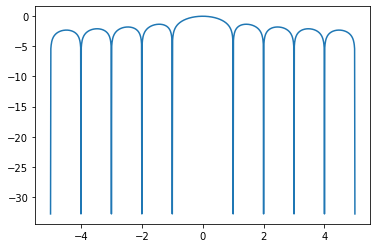

In [94]:
plt.plot(offset,np.log10(po/po.max()))

In [86]:
po[50]

1048576.0

In [126]:
np.hanning

<function numpy.hanning(M)>

In [22]:
xx=np.arange(0,16)

In [20]:
xx[::2]

array([1, 3, 5, 7, 9])

In [23]:
xx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])